<a href="https://colab.research.google.com/github/lgvb1899/FCC/blob/development/FCC_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to run my code:
Please upload the attached files I emailed you using the left side tab thing. You can select all of them and upload them all at the same time, so you do not need to upload them one by one.

My code can then just be run by running each cell in order.

The first will not output anything.

The second will output a map of my buoys.

All the rest will output a series of graphs ending in one large one. The smaller series are year by year graphs, and the last one is all the years combined to see the general trends. 

In [0]:
# Different programs I need

# cartopy installation
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev
!pip install OWSLib

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


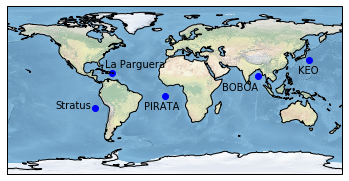

In [0]:
# Buoys that I picked and their locations

# importing my csv file that contain name, latitude, and longitude
df = pd.read_csv('data_used.csv')

# initializing some lists
longs = []
lats = []

# taking latitude and longitude info and putting them into two separate lists
for i in df.index: # going through all items in df
  longs += [df.loc[i]['Longitude']]
  lats += [df.loc[i]['Latitude']]
  
# importing map and setting layout
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# setting map to be whole world
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# plotting my latitudes and longitudes  
for i in df.index:
  ax.scatter(longs[i], lats[i], color='blue', transform=ccrs.PlateCarree())

# adding coastline
ax.add_feature(cfeature.COASTLINE)

# adding the names of all the bouys to the map
plt.text(-90, -19.6, 'Stratus',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(155, 18, 'KEO',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(90, 0, 'BOBOA',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(-10, 25, 'La Parguera',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(5, -20, 'PIRATA',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


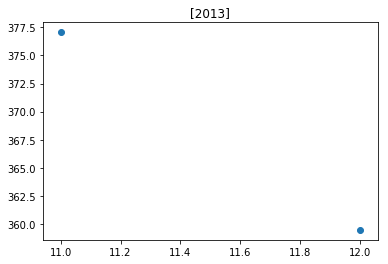

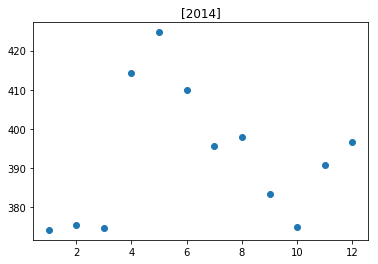

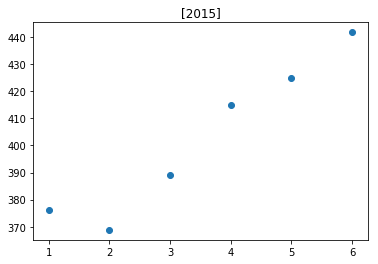

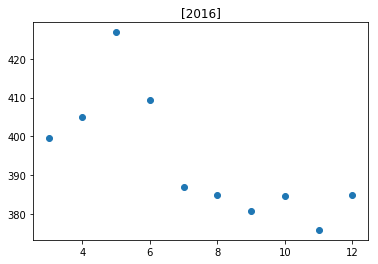

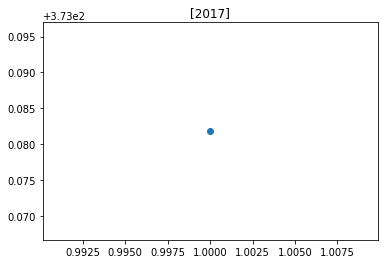

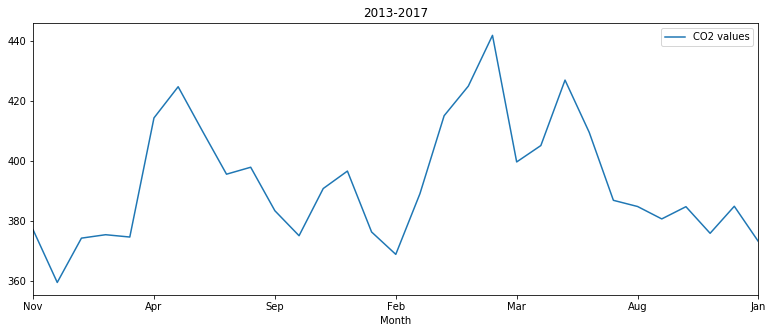

In [40]:
# BOBOA DATA
# manipulated the excel file first to contain the columns I wanted

# reading my csv files into dataframes
boboadf1 = pd.read_csv('BOBOA_90E_15N_dp01_Nov2013_Dec2014.csv')
boboadf2 = pd.read_csv('BOBOA_90E_15N_dp02_Dec2014_Jun2015.csv')
boboadf3 = pd.read_csv('BOBOA_90E_15N_dp03_Mar2016_Jan2017.csv')

# combining my dataframes into 1
boboadf = boboadf1.append(boboadf2)
boboadf = pd.concat([boboadf, boboadf3], axis = 0)

# dropping the first row (index 0) becuase it contains strings and messed up my data analysis
boboadf = boboadf.drop(boboadf.index[0])

# setting all values in the CO2 column to floats in order to use them later
boboadf['xCO2_SW_dry'] = boboadf['xCO2_SW_dry'].astype(float)

# converting dates to datetime in order to isolate specific year and month data more easily
import datetime
boboadf['Date'] = pd.to_datetime(boboadf['Date'])
boboadf['year'], boboadf['month'] = boboadf['Date'].dt.year, boboadf['Date'].dt.month

# initializing arrays
all_years = []
month_arary = []
month_number_array = []

# breaking up the data in a way to easily see monthly and yearly trends
for subset in boboadf.groupby('year'): # group by year first
  total_year = []
  year_subset = subset[1] # getting dataframe info
  month_array = []
  months = year_subset['month'].unique() # getting each month
  for vals in months:
    month_number_array += [vals] # putting each month value into an array to be able to plot it 
  for sub_subset in year_subset.groupby('month'): # grouping by month
    month_subset = sub_subset[1]
    month_avg = month_subset['xCO2_SW_dry'].mean() # now I have one year and one month of CO2 data, this takes the average of that data to give me an average CO2 value for one month
    month_array += [month_avg ]# adding monthly values to an array
  year_values = month_array # array of one years worth of monthly values
  year = year_subset['year'].unique() # getting the year so that I can use it as a label for my graphs
  plt.scatter(months,year_values) # plotting the months and data of one year
  plt.title(year, loc = 'center') # setting the year as the title of the graph
  plt.show()
  total_year += year_values # grouping monthly lists by year
  
  all_years += total_year # all data in one array. contains multiple arrays that each have monthly data, 1 array for 1 year

# converting the month numbers into month names
month_names = []
for i in month_number_array:
  z = datetime.datetime(2013,i,2) # needed to input year and day, so these are random
  month_names += [z.strftime("%b")] # %b converts to name of month, adding them to an array

# creating dataframe of the month names and co2 calues in order to plot
data = {'Month':month_names, 'CO2 values':all_years} 
df = pd.DataFrame(data) 
df.plot(x='Month', y='CO2 values', title = '2013-2017', figsize=(13,5))



/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


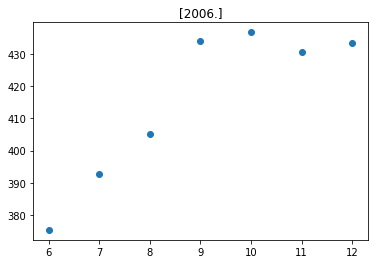

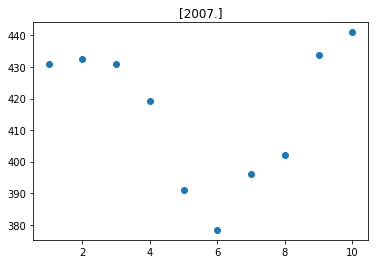

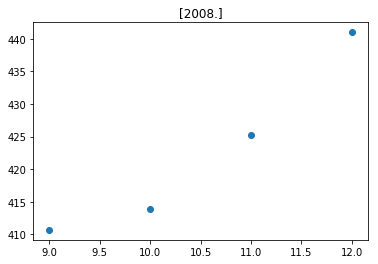

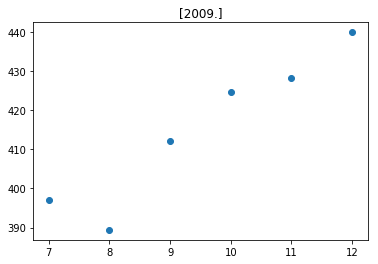

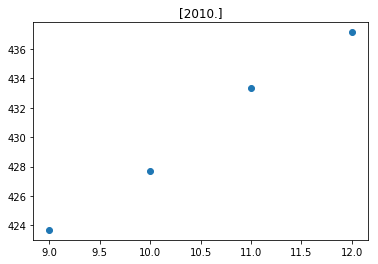

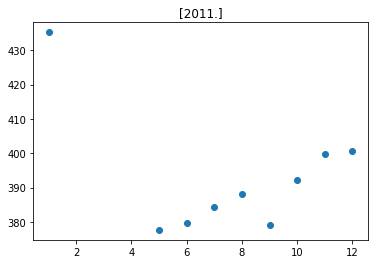

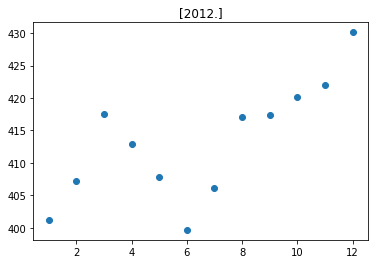

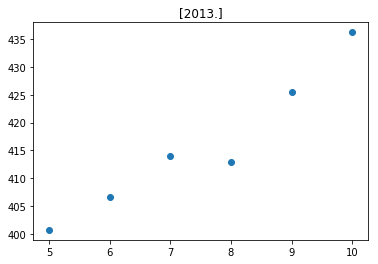

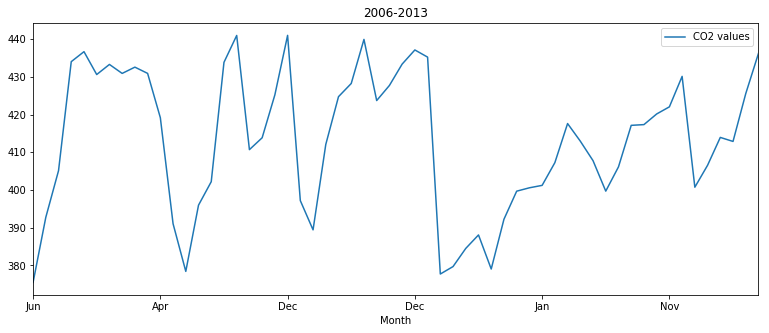

In [41]:
# PIRATA
# dropped columns I did not want. WOULD NOT RECOMMEND 

# reading ech file into its own dataframe and dropping the columns I don't want
pirdf1 = pd.read_csv('PIRATA_6S10W_8JUN_2006_28JUN_2007.csv')
pirdf1 = pirdf1.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'SST',	'SSS',	'ATM_PRE',	'OXYGEN',	'OXYGEN_TMP'])

pirdf2 = pd.read_csv('PIRATA_6S10W_11JUL_07DEC_2009.csv')
pirdf2 = pirdf2.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'SST',	'SSS',	'ATM_PRE',	'OXYGEN',	'OXYGEN_TMP'])

pirdf3 = pd.read_csv('PIRATA_6S10W_12MAY_2011_10APR_2012.csv')
pirdf3 = pirdf3.drop(columns = ['DAY_OF_YEAR', 'HH', 'SST',	'SSS',	'ATM_PRE',	'OXYGEN',	'OXYGEN_TMP'])

pirdf4 = pd.read_csv('PIRATA_6S10W_17SEP_31DEC_2008.csv')
pirdf4 = pirdf4.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'LATITUDE', 'LONGITUDE', 'SST',	'SSS',	'ATM_PRE'])

pirdf5 = pd.read_csv('PIRATA_6S10W_19apr2012_35DR20120419.csv')
pirdf5 = pirdf5.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'LATITUDE', 'LONGITUDE', 'SST',	'SSS',	'ATM_PRE'])

pirdf6 = pd.read_csv('PIRATA_6S10W_23may2013_35DR20130523.csv')
pirdf6 = pirdf6.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'LATITUDE', 'LONGITUDE', 'SST',	'SSS'])

pirdf7 = pd.read_csv('PIRATA_6S10W_26SEP_2010_30Jan_2011.csv')
pirdf7 = pirdf7.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'SST',	'SSS',	'ATM_PRE',	'OXYGEN',	'OXYGEN_TMP'])

pirdf8 = pd.read_csv('PIRATA_6S10W_29JUN_13OCT_2007.csv')
pirdf8 = pirdf8.drop(columns = ['DAY_OF_YEAR', 'HH', 'SS', 'SST',	'SSS',	'ATM_PRE',	'OXYGEN',	'OXYGEN_TMP'])

# concatenating dataframes into 1 in year order
PIRATAdf = pd.concat([pirdf1, pirdf8, pirdf4, pirdf2, pirdf7, pirdf3, pirdf5, pirdf6])

# dropping the first row (index 0) becuase it contains strings and messed up my data analysis
PIRATAdf = PIRATAdf.drop(PIRATAdf.index[0])

# setting all values in the CO2 column to floats in order to use them later
PIRATAdf['FCO2_WAT'] = PIRATAdf['FCO2_WAT'].astype(float)

# initializing arrays
all_years = []
month_arary = []
month_number_array = []

# breaking up the data in a way to easily see monthly and yearly trends
for subset in PIRATAdf.groupby('YYYY'): # group by year first
  total_year = []
  year_subset = subset[1] # getting dataframe info
  month_array = []
  months = year_subset['MM'].unique() # getting each month
  for vals in months:
    month_number_array += [vals] # putting each month value into an array to be able to plot it 
  for sub_subset in year_subset.groupby('MM'): # grouping by month
    month_subset = sub_subset[1]
    month_avg = month_subset['FCO2_WAT'].mean() # now I have one year and one month of CO2 data, this takes the average of that data to give me an average CO2 value for one month
    month_array += [month_avg ]# adding monthly values to an array
  year_values = month_array # array of one years worth of monthly values
  year = year_subset['YYYY'].unique() # getting the year so that I can use it as a label for my graphs
  plt.scatter(months,year_values)
  plt.title(year, loc = 'center') # setting the year as the title of the graph
  plt.show()
  total_year += year_values # grouping monthly lists by year
  
  all_years += total_year # all data in one array. contains multiple arrays that each have monthly data, 1 array for 1 year
    
# changing the month values from floats to integers becuase the next step did work, giving the error that it expected an int
for i in range(58):
  month_number_array[i] = int(month_number_array[i]) 
  
# converting the month numbers into month names  
month_names = []
for j in month_number_array:
  z = datetime.datetime(2013,j,2)
  month_names += [z.strftime("%b")]

# creating dataframe of the month names and co2 calues in order to plot
data = {'Month':month_names, 'CO2 values':all_years} 
df = pd.DataFrame(data) 
df.plot(x='Month', y='CO2 values', title = '2006-2013', figsize=(13,5))


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


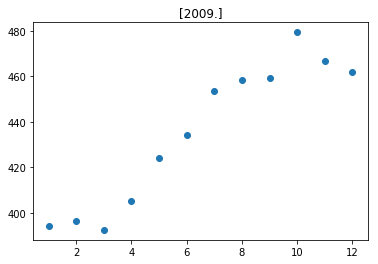

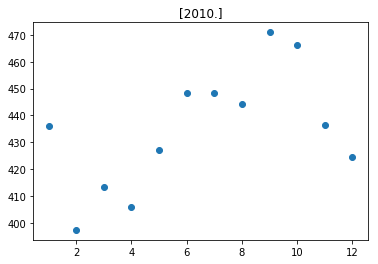

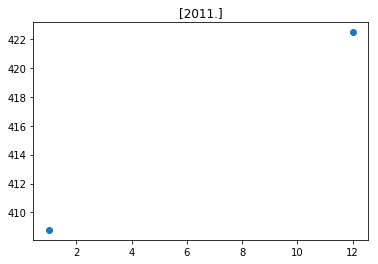

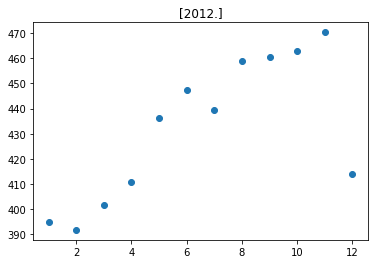

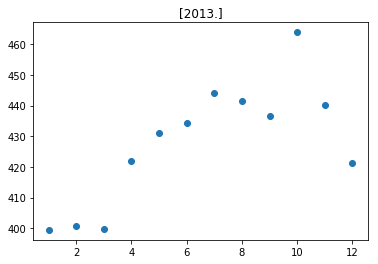

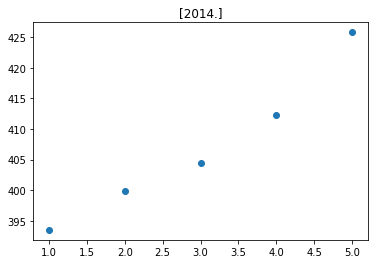

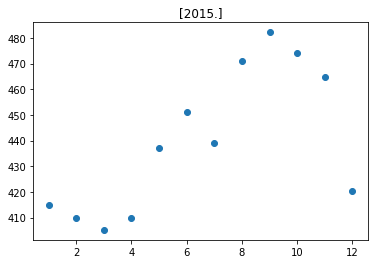

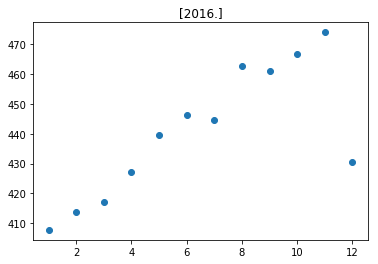

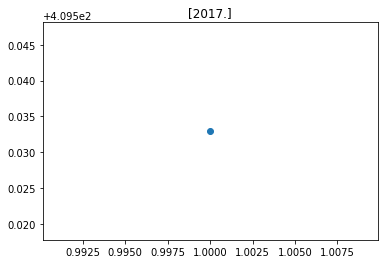

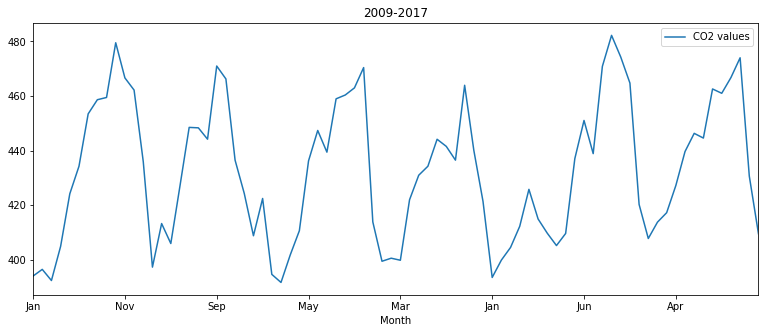

In [42]:
# La Parguera
# Only took the columns I needed (opposite of last time)
# Better than last option, but manipulating the excel sheet is significantly easier and quicker

# reading each file into own dataframe and then replacing that df with one containing only the columns I want
ladf1 = pd.read_csv('La_Parguera_67W_18N_Aug2016_Jan2017.csv')
ladf1 = ladf1[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf2 = pd.read_csv('La_Parguera_67W_18N_Dec2011_Nov2012.csv')
ladf2 = ladf2[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf3 = pd.read_csv('La_Parguera_67W_18N_Dec2012_Dec2013.csv')
ladf3 = ladf3[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf4 = pd.read_csv('La_Parguera_67W_18N_Dec2013_May2014.csv')
ladf4 = ladf4[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf5 = pd.read_csv('La_Parguera_67W_18N_Dec2015_Aug2016.csv')
ladf5 = ladf5[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf6 = pd.read_csv('La_Parguera_67W_18N_Jan2009_Jan2010.csv')
ladf6 = ladf6[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)', ]]

ladf7 = pd.read_csv('La_Parguera_67W_18N_Jan2010_Jan2011.csv')
ladf7 = ladf7[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf8 = pd.read_csv('La_Parguera_67W_18N_Jan2011_Nov2011.csv')
ladf8 = ladf8[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]

ladf9 = pd.read_csv('La_Parguera_67W_18N_Jan2015_Dec2015.csv')
ladf9 = ladf9[['Mooring Name', 'Latitude', 'Longitude', 'Date', 'xCO2 SW (wet) (umol/mol)']]


# concatenating them into 1 by year 
pargueradf = pd.concat([ladf6, ladf7, ladf2, ladf3, ladf4, ladf9, ladf5, ladf1])

# converting dates to datetime in order to isolate specific year and month data more easily
import datetime
pargueradf['Date'] = pd.to_datetime(pargueradf['Date'])
pargueradf['year'], pargueradf['month'] = pargueradf['Date'].dt.year, pargueradf['Date'].dt.month

# initializing arrays
all_years = []
month_arary = []
month_number_array = []

# breaking up the data in a way to easily see monthly and yearly trends
for subset in pargueradf.groupby('year'): # group by year first
  total_year = []
  year_subset = subset[1] # getting dataframe info
  month_array = []
  months = year_subset['month'].unique() # getting each month
  for vals in months:
    month_number_array += [vals] # putting each month value into an array to be able to plot it 
  for sub_subset in year_subset.groupby('month'): # grouping by month
    month_subset = sub_subset[1]
    month_avg = month_subset['xCO2 SW (wet) (umol/mol)'].mean() # now I have one year and one month of CO2 data, this takes the average of that data to give me an average CO2 value for one month
    month_array += [month_avg ]# adding monthly values to an array
  year_values = month_array # array of one years worth of monthly values
  year = year_subset['year'].unique() # getting the year so that I can use it as a label for my graphs  
  plt.scatter(months,year_values)
  plt.title(year, loc = 'center') # setting the year as the title of the graph
  plt.show()
  total_year += year_values # grouping monthly lists by year
  
  all_years += total_year # all data in one array. contains multiple arrays that each have monthly data, 1 array for 1 year

# changing the month values from floats to integers becuase the next step did work, giving the error that it expected an int
for i in range(80):
  month_number_array[i] = int(month_number_array[i]) 

# converting the month numbers into month names
month_names = []
for j in month_number_array:
  z = datetime.datetime(2013,j,2)
  month_names += [z.strftime("%b")]

# creating dataframe of the month names and co2 calues in order to plot
data = {'Month':month_names, 'CO2 values':all_years} 
df = pd.DataFrame(data) 
df.plot(x='Month', y='CO2 values', title = '2009-2017', figsize=(13,5))


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


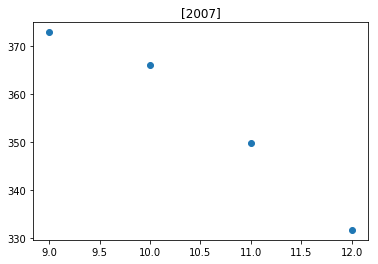

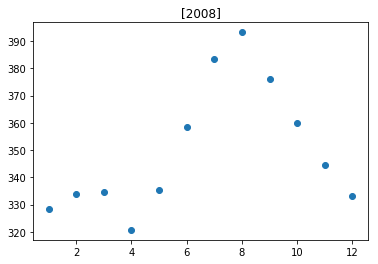

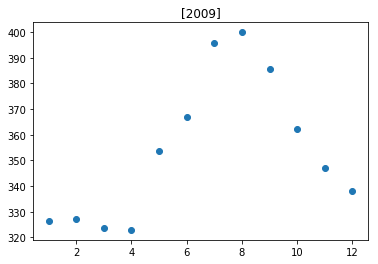

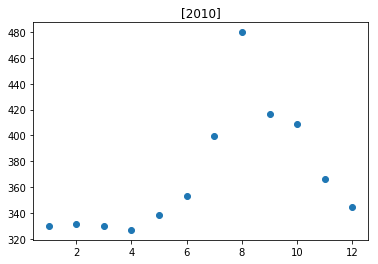

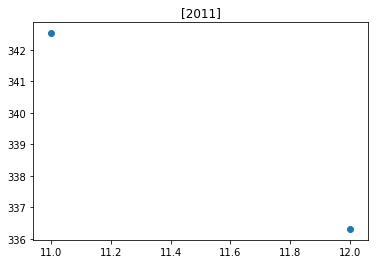

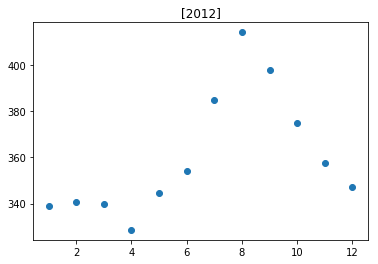

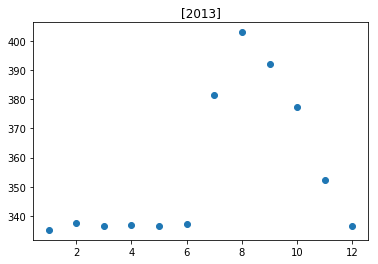

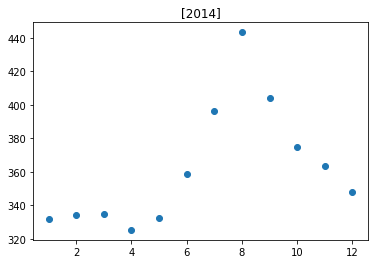

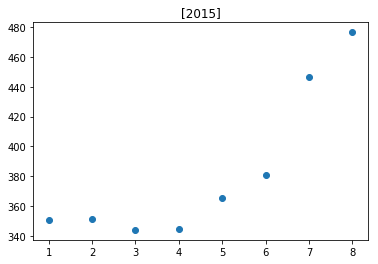

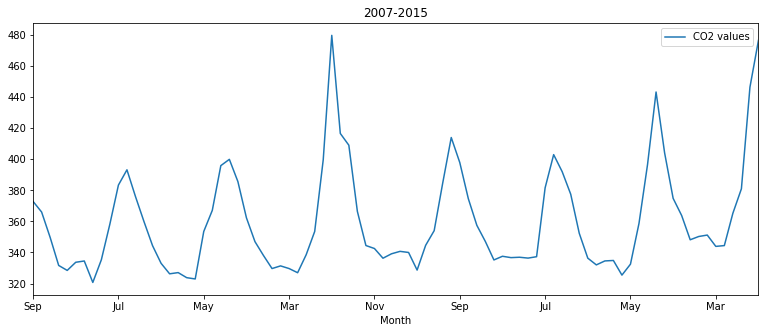

In [43]:
# KEO bouy
# manipulated data in excel first

# reading data into own dataframes
keodf1 = pd.read_csv('KEO_145E_32N_Jul2012_Mar2013.csv')
keodf2 = pd.read_csv('KEO_145E_32N_Jul2013_Jun2014.csv')
keodf3 = pd.read_csv('KEO_145E_32N_Jun2014_Aug2015.csv')
keodf4 = pd.read_csv('KEO_145E_32N_Nov2011_Jul2012.csv')
keodf5 = pd.read_csv('KEO_145E_32N_Sep2007_Jul2008.csv')
keodf6 = pd.read_csv('KEO_145E_32N_Sep2008_Sep2009.csv')
keodf7 = pd.read_csv('KEO_145E_32N_Sep2009_Sep2010.csv')
keodf8 = pd.read_csv('KEO_145E_32N_Sep2010_Dec2010.csv')


# concatenating dataframes by year
KEOdf = pd.concat([keodf5, keodf6, keodf7, keodf8, keodf4, keodf1, keodf2, keodf3])

# converting dates to datetime in order to isolate specific year and month data more easily
import datetime
KEOdf['Date'] = pd.to_datetime(KEOdf['Date'])
KEOdf['year'], KEOdf['month'] = KEOdf['Date'].dt.year, KEOdf['Date'].dt.month

# initializing arrays
all_years = []
month_arary = []
month_number_array = []

# breaking up the data in a way to easily see monthly and yearly trends
for subset in KEOdf.groupby('year'): # group by year first
  total_year = []
  year_subset = subset[1] # getting dataframe info
  month_array = []
  months = year_subset['month'].unique() # getting each month
  for vals in months:
    month_number_array += [vals] # putting each month value into an array to be able to plot it 
  for sub_subset in year_subset.groupby('month'): # grouping by month
    month_subset = sub_subset[1]
    month_avg = month_subset['xCO2  SW (wet) (umol/mol)'].mean() # now I have one year and one month of CO2 data, this takes the average of that data to give me an average CO2 value for one month
    month_array += [month_avg ]# adding monthly values to an array
  year_values = month_array # array of one years worth of monthly values
  year = year_subset['year'].unique() # getting the year so that I can use it as a label for my graphs  
  plt.scatter(months,year_values)
  plt.title(year, loc = 'center') # setting the year as the title of the graph
  plt.show()
  total_year += year_values # grouping monthly lists by year
  
  all_years += total_year # all data in one array. contains multiple arrays that each have monthly data, 1 array for 1 year

# converting the month numbers into month names
month_names = []
for j in month_number_array:
  z = datetime.datetime(2013,j,2)
  month_names += [z.strftime("%b")]

# creating dataframe of the month names and co2 calues in order to plot
data = {'Month':month_names, 'CO2 values':all_years} 
df = pd.DataFrame(data) 
df.plot(x='Month', y='CO2 values', title = '2007-2015', figsize=(13,5))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


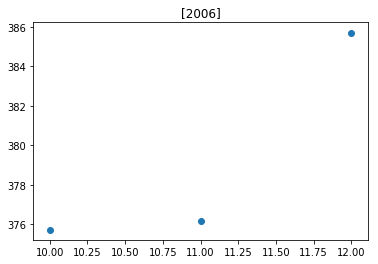

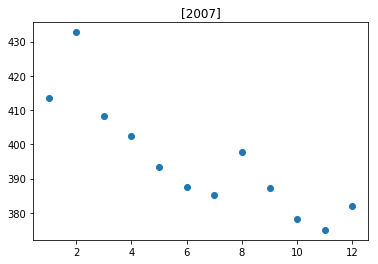

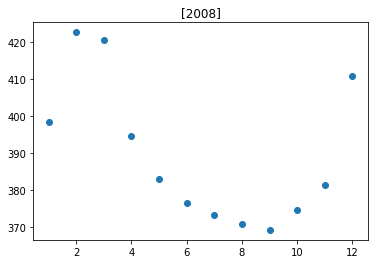

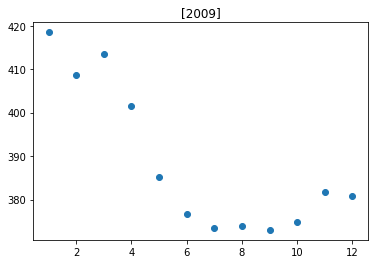

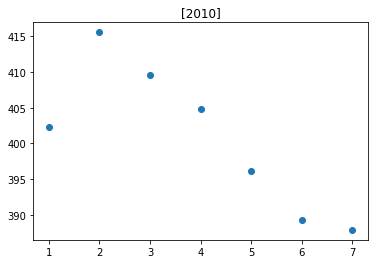

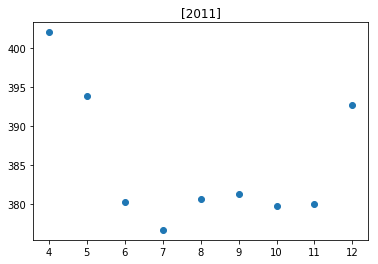

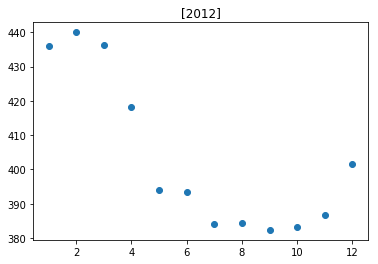

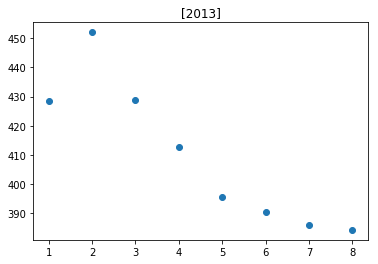

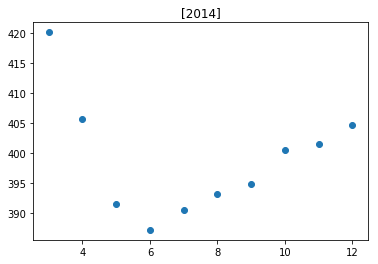

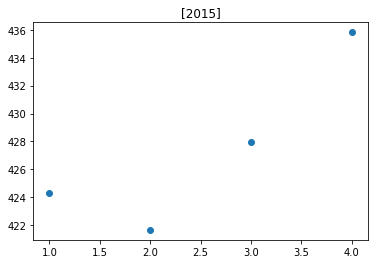

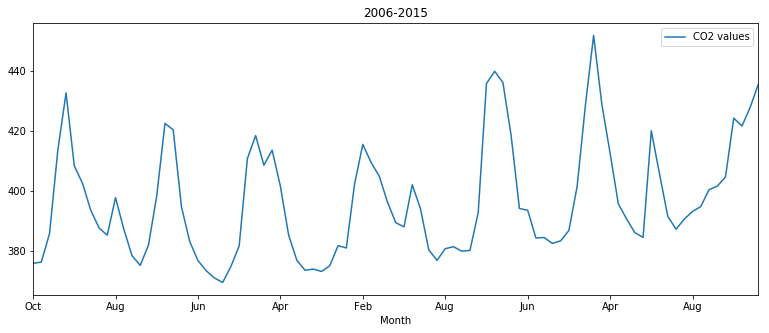

In [44]:
# Stratus bouy
# manipulated data in excel first

# reading data into own dataframe
sdf1 = pd.read_csv('Stratus_85W_20S_Apr2011_Jun2012.csv')
sdf2 = pd.read_csv('Stratus_85W_20S_Jan2010_Jul2010.csv')
sdf3 = pd.read_csv('Stratus_85W_20S_Mar2014_Apr2015.csv')
sdf4 = pd.read_csv('Stratus_85W_20S_Oct2006_Oct2007.csv')
sdf5 = pd.read_csv('Stratus_85W_20S_Oct2007_Oct2008.csv')
sdf6 = pd.read_csv('Stratus_85W_20S_Oct2008_Jan2010.csv')
sdf7 = pd.read_csv('Stratus_85W_20S_dp06_May2012_Aug2013.csv')


# concatenating dataframes by year
Stratusdf = pd.concat([sdf4, sdf5, sdf6, sdf2, sdf1, sdf7, sdf3])

# converting dates to datetime in order to isolate specific year and month data more easily
import datetime
Stratusdf['Date'] = pd.to_datetime(Stratusdf['Date'])
Stratusdf['year'], Stratusdf['month'] = Stratusdf['Date'].dt.year, Stratusdf['Date'].dt.month

# initializing arrays
all_years = []
month_arary = []
month_number_array = []

# breaking up the data in a way to easily see monthly and yearly trends
for subset in Stratusdf.groupby('year'): # group by year first
  total_year = []
  year_subset = subset[1] # getting dataframe info
  month_array = []
  months = year_subset['month'].unique() # getting each month
  for vals in months:
    month_number_array += [vals] # putting each month value into an array to be able to plot it 
  for sub_subset in year_subset.groupby('month'): # grouping by month
    month_subset = sub_subset[1]
    month_avg = month_subset['xCO2  SW (wet) (umol/mol)'].mean() # now I have one year and one month of CO2 data, this takes the average of that data to give me an average CO2 value for one month
    month_array += [month_avg ]# adding monthly values to an array
  year_values = month_array # array of one years worth of monthly values
  year = year_subset['year'].unique() # getting the year so that I can use it as a label for my graphs  
  plt.scatter(months,year_values)
  plt.title(year, loc = 'center') # setting the year as the title of the graph
  plt.show()
  total_year += year_values # grouping monthly lists by year
  
  all_years += total_year # all data in one array. contains multiple arrays that each have monthly data, 1 array for 1 year

# converting the month numbers into month names
month_names = []
for j in month_number_array:
  z = datetime.datetime(2013,j,2)
  month_names += [z.strftime("%b")]

# creating dataframe of the month names and co2 calues in order to plot
data = {'Month':month_names, 'CO2 values':all_years} 
df = pd.DataFrame(data) 
df.plot(x='Month', y='CO2 values', title = '2006-2015', figsize=(13,5))